In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
f = open('zomato.csv',"rb")
df = pickle.load(f)

In [31]:
df_delhi = df.copy()[df['City'] == 'New Delhi']

df_delhi.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2560,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,2
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45
2563,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,11
2564,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,238


In [5]:
df_delhi.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

pre-processing and preparing the dataset

In [32]:
# removing the unnecessary columns 

df_delhi = df_delhi.iloc[:,[1,5,7,8,9,10,12,13,14,15,16,17,18,19,20]]
#df_delhi.set_index("Restaurant Name", inplace = True)

In [18]:
df_delhi.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2560,Food Cloud,Aaya Nagar,0.000000,0.000000,Cuisine Varies,500,No,No,No,No,2,0.0,White,Not rated,2
2561,Burger.in,Adchini,77.196923,28.535382,Fast Food,350,No,Yes,No,No,1,3.2,Orange,Average,46
2562,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",1500,Yes,Yes,No,No,3,3.4,Orange,Average,45
2563,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",500,No,No,No,No,2,2.6,Orange,Average,11
2564,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",500,No,Yes,No,No,2,3.4,Orange,Average,238


In [ ]:
df_delhi.set_index

In [52]:
df_delhi.isnull().sum()
# no apparent missing values

Restaurant Name         0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [49]:
df_delhi['Longitude'].describe()
df_delhi['Latitude'].describe()

count    5473.000000
mean       27.398205
std         5.778869
min         0.000000
25%        28.557430
50%        28.621372
75%        28.654577
max        35.000000
Name: Latitude, dtype: float64

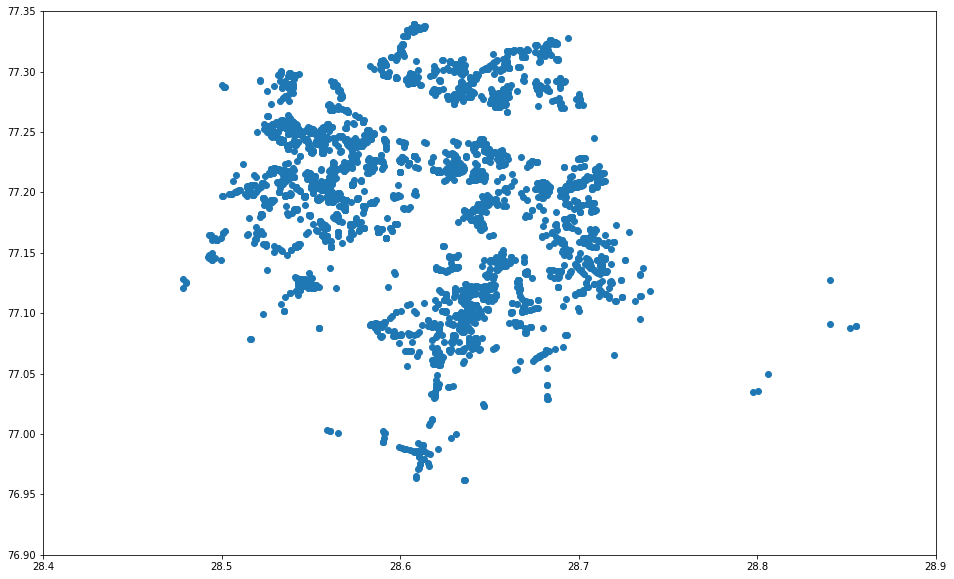

In [51]:
#df_delhi.plot('Latitude', 'Longitude', kind ='scatter')
import matplotlib.pyplot as plt

plt.figure(figsize = (16,10))
plt.scatter(df_delhi['Latitude'], df_delhi['Longitude'])
plt.xlim((28.4,28.9))
plt.ylim((76.9,77.35))
plt.show()

In [33]:
# impute the (lat,Long) = (0,0) with the median (Lat, Long)

missing_lats = np.where(df_delhi['Latitude'] == 0)[0]
missing_longs = np.where(df_delhi['Longitude'] == 0)[0]

# get the localities where we dont have the cordinate
# repplace the true cordinate if the locality is present in other obs 
# ele impute using median
localities = list(df_delhi.iloc[missing_lats,1])

#print(len(localities.unique()))
#print(len(df_delhi['Locality'].unique()))

# for loc in localities:
#     df_delhi[df_delhi['Locality'] == loc,:]
#localities.drop_index(inplace = True)
# localities
# df_delhi.Locality in localities
# #df_delhi[df_delhi.Locality in localities]

lat_med = np.median(df_delhi['Latitude'])
lon_med = np.median(df_delhi['Longitude'])
# df_delhi.iloc[missing_lats,3] = lat_med
# df_delhi.iloc[missing_lats,4] = lon_med
print(lon_med)
# df_delhi.iloc[missing_lats,3]

# for obs in missing_lats:
#     print(df_delhi.iloc[obs,3])
#     df_delhi.iloc[obs, 3] = lat_med
# #     print(df_delhi.iloc[obs,3])
    
df_delhi.Latitude.replace(0,lat_med,inplace = True)
df_delhi.iloc[missing_lats,:]

df_delhi.Longitude.replace(0,lon_med,inplace = True)

df_delhi.head()

#missing_lats = np.where(df_delhi['Latitude'] == 0)[0]

#print(missing_lats)

77.20421


,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2560,Food Cloud,Aaya Nagar,77.204210,28.621372,Cuisine Varies,500,No,No,No,No,2,0.0,White,Not rated,2
2561,Burger.in,Adchini,77.196923,28.535382,Fast Food,350,No,Yes,No,No,1,3.2,Orange,Average,46
2562,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",1500,Yes,Yes,No,No,3,3.4,Orange,Average,45
2563,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",500,No,No,No,No,2,2.6,Orange,Average,11
2564,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",500,No,Yes,No,No,2,3.4,Orange,Average,238


In [6]:
print(localities)
# These are all the places where we don't know the latitude and Longitude for some restaurants
# we should replace the missing ones using the median/mean within each group of the available ones

['Aaya Nagar', 'Alaknanda', 'Alaknanda', 'Ashok Vihar Phase 1', 'Chandni Chowk', 'Chandni Chowk', 'Chittaranjan Park', 'Chittaranjan Park', 'Chittaranjan Park', 'Chittaranjan Park', 'Chittaranjan Park', 'Daryaganj', 'Daryaganj', 'Daryaganj', 'Daryaganj', 'Defence Colony', 'Dilshad Garden', 'Durga Puri', 'East of Kailash', 'East of Kailash', 'East of Kailash', 'East of Kailash', 'East of Kailash', 'East of Kailash', 'East of Kailash', 'East of Kailash', 'East of Kailash', 'East of Kailash', 'East of Kailash', 'East Patel Nagar', 'East Patel Nagar', 'Geeta Colony', 'Geeta Colony', 'Geeta Colony', 'Geeta Colony', 'Geeta Colony', 'Geeta Colony', 'Geeta Colony', 'Geeta Colony', 'Greater Kailash (GK) 1', 'Greater Kailash (GK) 1', 'Greater Kailash (GK) 3', 'Green Park', 'Green Park', 'Green Park', 'Green Park', 'Green Park', 'Green Park', 'Green Park', 'GTB Nagar', 'GTB Nagar', 'GTB Nagar', 'GTB Nagar', 'Gujranwala Town', 'Hauz Khas', 'Hauz Khas', 'Hauz Khas', 'ibis New Delhi, Aerocity', 'Ind

In [168]:
df_delhi.iloc[1272,:]

Restaurant Name                              Oh Boy Lounge
Locality                                         GTB Nagar
Longitude                                          77.2042
Latitude                                           28.6214
Cuisines                North Indian, Chinese, Continental
Average Cost for two                                  1000
Has Table booking                                       No
Has Online delivery                                     No
Is delivering now                                       No
Switch to order menu                                    No
Price range                                              3
Aggregate rating                                       3.1
Rating color                                        Orange
Rating text                                        Average
Votes                                                    5
Name: 3832, dtype: object

In [34]:
np.where(df_delhi['Latitude'] > 34)

df_delhi.Latitude.replace(35, lat_med, inplace = True)
df_delhi.Longitude.replace(34, lon_med, inplace = True)

In [170]:
df_delhi.iloc[953,]

Restaurant Name         Test Restaruants for Medio
Locality                           East of Kailash
Longitude                                  77.2042
Latitude                                   28.6214
Cuisines                         Chinese, Lucknowi
Average Cost for two                           800
Has Table booking                              Yes
Has Online delivery                             No
Is delivering now                               No
Switch to order menu                            No
Price range                                      2
Aggregate rating                                 0
Rating color                                 White
Rating text                              Not rated
Votes                                            1
Name: 3513, dtype: object

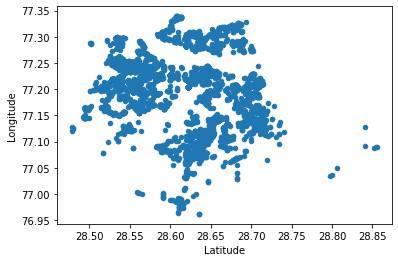

In [171]:
df_delhi.plot('Latitude','Longitude', kind = 'scatter')

# looks like map of delhi

In [9]:
df_delhi[df['Locality'] == 'Alaknanda']

C:\Users\iutti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2590,Aggarwal's Sweets Paradise,Alaknanda,77.254208,28.524974,"Mithai, North Indian, South Indian, Street Food",400,No,No,No,No,1,2.9,Orange,Average,8
2591,Bikaner Sweets,Alaknanda,77.254255,28.525321,"Mithai, Street Food",200,No,No,No,No,1,3.3,Orange,Average,20
2592,Cafe Coffee Day,Alaknanda,77.250146,28.528133,Cafe,450,No,No,No,No,1,3.2,Orange,Average,23
2593,Cakeophony By Sonali,Alaknanda,77.204210,28.621372,Bakery,400,No,No,No,No,1,3.4,Orange,Average,19
2594,Chandra Sweets,Alaknanda,77.254056,28.525572,"Mithai, North Indian, South Indian, Street Food",400,No,No,No,No,1,3.0,Orange,Average,7
2595,Chhotu Mashhoor Kathi Roll,Alaknanda,77.254112,28.525692,Fast Food,150,No,No,No,No,1,2.7,Orange,Average,11
2596,Green Chick Chop,Alaknanda,77.246899,28.528109,"Raw Meats, North Indian, Fast Food",350,No,No,No,No,1,3.2,Orange,Average,35
2597,Lazeez Restaurant,Alaknanda,77.254569,28.525665,"Chinese, North Indian, Italian, Mughlai",600,No,Yes,No,No,2,3.0,Orange,Average,11
2598,Madhuvan Chinese Fast Food,Alaknanda,77.253246,28.525603,Chinese,300,No,Yes,No,No,1,2.5,Orange,Average,32
2599,Mr Wong,Alaknanda,77.249793,28.525675,"Chinese, Thai",800,No,Yes,No,No,2,3.2,Orange,Average,10


 exactly what I have been expecting. Instead of using median imputation with the median of the whole sample, we should use the median that particular place, e.g. here we should replace the mean of the available places in Alaknanda only.

Most boring part

Convert the text columns into Label Encoding/One Hot encoding 

In [35]:
# TASKS: 
# Pre-process the text columns 

## These are nominal, also binary, only LabelEncoding is enough
# Has Table booking
# Has Online delivery
# Is delivering now
# Switch to order menu

## These two are ordinal features-OrdinalEncoder??
# Rating color
# Rating text

# labelEncoding the nominal features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

vars = [6,7,8,9]

for var in vars:
    #df_delhi.iloc[:,var] = df_delhi.iloc[:,var].astype('str')
    #print(df_delhi.iloc[:,var].head(10))
    df_delhi.iloc[:, var] = le.fit_transform(df_delhi.iloc[:,var])

df_delhi.head(10)



,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2560,Food Cloud,Aaya Nagar,77.204210,28.621372,Cuisine Varies,500,0,0,0,0,2,0.0,White,Not rated,2
2561,Burger.in,Adchini,77.196923,28.535382,Fast Food,350,0,1,0,0,1,3.2,Orange,Average,46
2562,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",1500,1,1,0,0,3,3.4,Orange,Average,45
2563,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",500,0,0,0,0,2,2.6,Orange,Average,11
2564,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",500,0,1,0,0,2,3.4,Orange,Average,238
2565,Mezbaan Grills,Adchini,77.198122,28.538134,Mughlai,400,0,0,0,0,1,3.1,Orange,Average,8
2566,Say Cheese,Adchini,77.198159,28.537448,Fast Food,400,0,1,0,0,1,2.7,Orange,Average,64
2567,Southy,Adchini,77.197950,28.537474,South Indian,450,0,1,0,0,1,2.6,Orange,Average,113
2568,Monosoz,Adchini,77.198042,28.538394,Pizza,300,0,1,0,0,1,3.7,Yellow,Good,66
2569,Waves,Adchini,77.198808,28.538666,"North Indian, Chinese",1500,1,1,0,0,3,3.5,Yellow,Good,141


In [36]:
# ordinal encoding the ordinal features 
# should we need to do it? We already have the exact rating
# Leave it for later

df_delhi = df_delhi.drop(columns = ['Rating color','Rating text'], axis = 1)

df_delhi.head(10)

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
2560,Food Cloud,Aaya Nagar,77.204210,28.621372,Cuisine Varies,500,0,0,0,0,2,0.0,2
2561,Burger.in,Adchini,77.196923,28.535382,Fast Food,350,0,1,0,0,1,3.2,46
2562,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",1500,1,1,0,0,3,3.4,45
2563,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",500,0,0,0,0,2,2.6,11
2564,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",500,0,1,0,0,2,3.4,238
2565,Mezbaan Grills,Adchini,77.198122,28.538134,Mughlai,400,0,0,0,0,1,3.1,8
2566,Say Cheese,Adchini,77.198159,28.537448,Fast Food,400,0,1,0,0,1,2.7,64
2567,Southy,Adchini,77.197950,28.537474,South Indian,450,0,1,0,0,1,2.6,113
2568,Monosoz,Adchini,77.198042,28.538394,Pizza,300,0,1,0,0,1,3.7,66
2569,Waves,Adchini,77.198808,28.538666,"North Indian, Chinese",1500,1,1,0,0,3,3.5,141


In [ ]:
# Thoughts at this point:
# What to predict? 
# 1. predict whether the rating is above 4.0?
# 2. Average price for two, but then can't use Price range
# even if price is predictor, if we have price, do we need price range? 

# do we need Locality? We have (lat,long)
# probably we don't.

In [37]:
# drop price range

df_delhi = df_delhi.drop(columns = ['Price range'], axis = 1)


count    5473.000000
mean        2.438845
std         1.500079
min         0.000000
25%         0.000000
50%         3.100000
75%         3.500000
max         4.900000
Name: Aggregate rating, dtype: float64

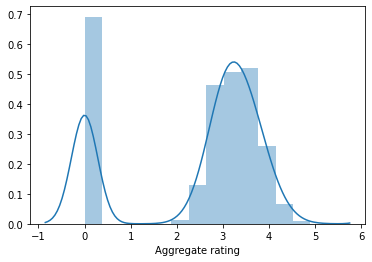

In [46]:
#ratings = np.where(df_delhi['Aggregate rating'] > 3.8, 1, 0)
# print(ratings)
# ratings[23:45]
# print(np.sum(ratings))
# ratings

import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df_delhi['Aggregate rating'])
# there are many 0s. These are missing values. Since the Q1 = 0, 25% obs have this feature missing.
# maybe just use the rest to predict these cases. i.e. impute these using a model 
df_delhi['Aggregate rating'].describe()


In [47]:
# dropping locality
df_delhi = df_delhi.drop(columns = ['Locality'], axis = 1)

In [48]:
df_delhi.head(10)

,Restaurant Name,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Votes
2560,Food Cloud,77.204210,28.621372,Cuisine Varies,500,0,0,0,0,0.0,2
2561,Burger.in,77.196923,28.535382,Fast Food,350,0,1,0,0,3.2,46
2562,Days of the Raj,77.197475,28.535493,"North Indian, Seafood, Continental",1500,1,1,0,0,3.4,45
2563,Dilli Ka Dhaba,77.198033,28.537547,"South Indian, North Indian",500,0,0,0,0,2.6,11
2564,Govardhan,77.196924,28.535523,"South Indian, North Indian, Chinese",500,0,1,0,0,3.4,238
2565,Mezbaan Grills,77.198122,28.538134,Mughlai,400,0,0,0,0,3.1,8
2566,Say Cheese,77.198159,28.537448,Fast Food,400,0,1,0,0,2.7,64
2567,Southy,77.197950,28.537474,South Indian,450,0,1,0,0,2.6,113
2568,Monosoz,77.198042,28.538394,Pizza,300,0,1,0,0,3.7,66
2569,Waves,77.198808,28.538666,"North Indian, Chinese",1500,1,1,0,0,3.5,141


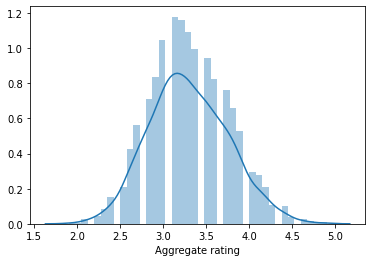

In [55]:
# another thought? what if the missing ratings corresponding to the ones with missing lat,longs??
# but so what?

missing_rats = np.where(df_delhi['Aggregate rating'] == 0)[0]
len(missing_rats)
# no, its a lengthier array

# making the train, test data out of the ones where we have the ratings 
avals = np.where(df_delhi['Aggregate rating'] != 0)[0]

# basically drop the ones where we dont have rating.
# thats the best solution

#X = df_delhi.iloc[avals,:].values
# print(X)

# dropping
df_delhi_dr = df_delhi.iloc[avals,:]
df_delhi_dr.head(10)

sns.distplot(df_delhi_dr['Aggregate rating'])


In [58]:
ratings = np.where(df_delhi_dr['Aggregate rating'] > 3.8, 1, 0)
np.sum(ratings)/len(ratings)

0.12055335968379446

In [ ]:
# do we need One Hot Encoding?
# R

# from sklearn.preprocessing import OneHotEncoder
# df_delhi_cat = df_delhi.iloc[:,[6,7,8,9,12,13]]
# ohe = OneHotEncoder()
# df_delhi_cat = ohe.fit_transform(df_delhi_cat).toarray()

# ohe = OneHotEncoder(categorical_features = [6,7,8,9,12,13])
# ohe.fit_transform(df_delhi)

In [59]:
# pre-processing cuisines
# get all the cuisines in a list
cuisines = df_delhi_dr.Cuisines

cuisines_list = []

# separating each cuisine in multicuisine restaurants and collecting them in a list

for word in cuisines:
    cuisines_list.append(word.split(','))
    
#cuisines_list

# making a dictionary out of unique cuisines
# this can be used to visualize the distribution of cuisines

cuisine_corpus = []

for x in cuisines:
    xs = x.split(',')
    cuisine_corpus.extend(xs)

cuisine_corpus = [x.strip() for x in cuisine_corpus]

cuisine_corpus_set = set(cuisine_corpus)

cuisine_dict = {ix:name for ix,name in enumerate(cuisine_corpus_set)}
cuisine_dict_reverse = {name:ix for ix,name in enumerate(cuisine_corpus_set)}

ids = []
for cui in cuisines_list:
    cui_list = []
    for cuis in cui:
        cuis = cuis.strip()
        idx = list(cuisine_dict.values()).index(cuis)
        #print(idx)
        cui_list.append(idx)
        #print(cui_list)
    ids.append(cui_list)

    
#print(ids)

# lists of list
one_hc = []

#
for x in ids:
    enc = [0]*len(cuisine_dict.values())
    for y in x:
        enc[y] = 1
    one_hc.append(enc)

#one_hc

In [60]:
cuisine_extracted = np.array(one_hc)
cuisine_extracted.shape


cuisine_vars = pd.DataFrame(cuisine_extracted, columns = cuisine_dict_reverse.keys())                               

In [62]:
df_zomato = pd.concat([cuisine_vars.reset_index(drop = True), 
                                    df_delhi_dr.drop(columns = ['Cuisines'],axis = 1).reset_index(drop = True)], axis = 1)
#df_delhi_cuisine_price.reset_index(drop = True)
df_zomato.head()

,Beverages,Chettinad,Thai,Finger Food,Tex-Mex,Korean,Raw Meats,South Indian,Ice Cream,Iranian,...,Restaurant Name,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Votes
0,0,0,0,0,0,0,0,0,0,0,...,Burger.in,77.196923,28.535382,350,0,1,0,0,3.2,46
1,0,0,0,0,0,0,0,0,0,0,...,Days of the Raj,77.197475,28.535493,1500,1,1,0,0,3.4,45
2,0,0,0,0,0,0,0,1,0,0,...,Dilli Ka Dhaba,77.198033,28.537547,500,0,0,0,0,2.6,11
3,0,0,0,0,0,0,0,1,0,0,...,Govardhan,77.196924,28.535523,500,0,1,0,0,3.4,238
4,0,0,0,0,0,0,0,0,0,0,...,Mezbaan Grills,77.198122,28.538134,400,0,0,0,0,3.1,8


In [63]:
df_zomato.shape

(4048, 88)

In [66]:
#creating the arrays for training

X = df_zomato.drop(columns = ['Restaurant Name','Aggregate rating'], axis = 1).values
y = ratings

print(X)
print(y)

[[  0.   0.   0. ...   0.   0.  46.]
 [  0.   0.   0. ...   0.   0.  45.]
 [  0.   0.   0. ...   0.   0.  11.]
 ...
 [  0.   0.   0. ...   0.   0.  25.]
 [  0.   0.   0. ...   0.   0. 109.]
 [  0.   0.   0. ...   0.   0. 334.]]
[0 0 0 ... 0 1 0]


In [67]:
# making training test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

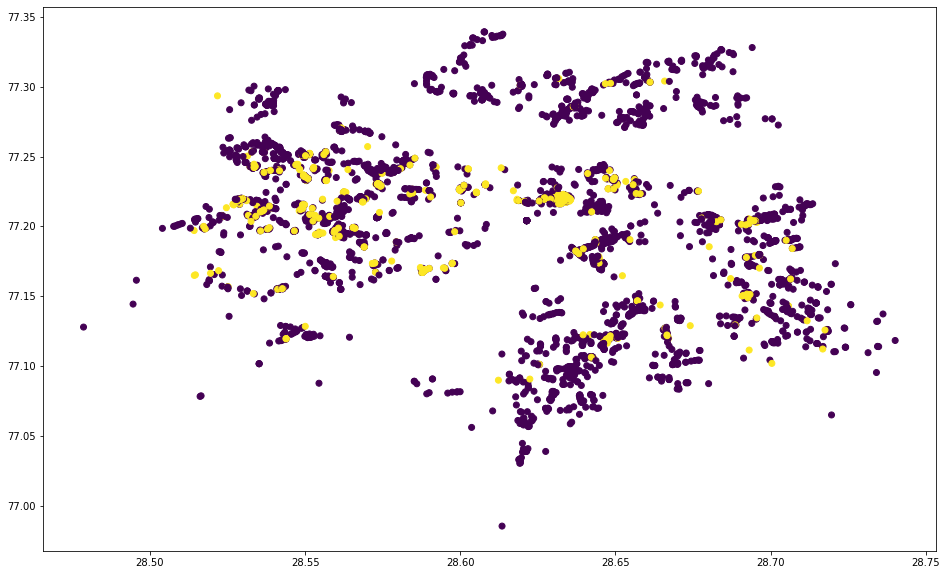

In [79]:
plt.figure(figsize=(16,10))
plt.scatter(df_zomato['Latitude'],df_zomato['Longitude'],c = ratings)
# dosen't look like a linear boundary would be of any help here

In [ ]:
## classification problem
# Logistic Regression
# Random Forest
# Ensemble model
# SVC
# MLP
# 

In [ ]:
# start with simpler models

# logistic Regression


In [75]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', class_weight = 0.12)
# add class weights
# 
svm.fit(X_train, y_train)



TypeError: object of type 'float' has no len()

In [70]:
y_preds = svm.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds)

array([[719,   9],
       [ 74,   8]], dtype=int64)